# Sentiment Analysis with NLP
This notebook performs **sentiment analysis** on customer reviews using **TF-IDF vectorization** and **Logistic Regression**.  
We classify reviews as **Positive (1)** or **Negative (0)** based on their rating score.

##  Step 1: Import Required Libraries

In [21]:
# Import Required Libraries
import pandas as pd
import re
import string
import swifter  # For fast apply operations
from tqdm import tqdm  # For progress bars (optional)
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Setup NLTK Stopwords
Download English stopwords from NLTK to clean the review text.


In [14]:
# Setup NLTK Resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Common words to remove from text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 3: Load and Prepare the Dataset
- Load the Amazon Reviews dataset.
- Sample 50,000 rows for faster processing.
- Drop `Score = 3` as it's neutral.
- Convert scores > 3 to Positive (1), and < 3 to Negative (0).


In [16]:
# Load the dataset
df = pd.read_csv('Reviews.csv')  # Make sure this CSV is in your directory

# Sample 50,000 reviews for faster processing
df = df.sample(n=50000, random_state=42)

# Keep only the text and score columns
df = df[['Text', 'Score']].dropna()

# Remove neutral reviews (Score = 3)
df = df[df['Score'] != 3]

# Convert scores into binary sentiment labels
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)



In [17]:
df.describe()

,Score,Sentiment
count,46209.000000,46209.000000
mean,4.289143,0.846264
std,1.309936,0.360700
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## Step 4: Text Cleaning & Preprocessing
Define a function to:
- Lowercase the text
- Remove URLs, HTML tags, and non-alphabetic characters
- Remove punctuation
- Remove stopwords


In [18]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|<.*?>|[^a-zA-Z]", " ", text)  # Remove URLs and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    # Remove stopwords
    return " ".join([word for word in text.split() if word not in stop_words])


## Step 5: Apply Preprocessing to All Reviews
Use `swifter` to speed up the application of our cleaning function on large data.


In [ ]:
df['Cleaned_Text'] = df['Text'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/46209 [00:00<?, ?it/s]

## Step 6: TF-IDF Vectorization
Convert the cleaned text into numerical vectors using TF-IDF (Term Frequency–Inverse Document Frequency).


In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text'])  # sparse matrix
y = df['Sentiment']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
sentiment_model = LogisticRegression()
sentiment_model.fit(X_train, y_train)

LogisticRegression()

## Step 7: Train the model
We use Logistic Regression for classification. The model is trained on the TF-IDF vectors from the training data.

In [7]:
# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Step 8: Evaluate the Model
Evaluate the model performance using accuracy, classification report, and a confusion matrix to visualize predictions.

 Test Accuracy: 0.9176585154728414
 Train Accuracy: 0.9305326372169773

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.53      0.65      1345
           1       0.93      0.98      0.95      7897

    accuracy                           0.92      9242
   macro avg       0.88      0.76      0.80      9242
weighted avg       0.91      0.92      0.91      9242



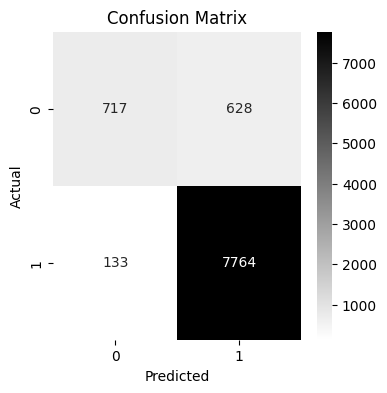

In [8]:
# Evaluate Model
print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print(" Train Accuracy:", model.score(X_train, y_train))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='binary')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Step 9: Real-Time Prediction Function
Define a function to predict sentiment of custom input text using the trained model.

In [9]:
# Real-Time Prediction Function
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec_sentiment = vectorizer.transform([cleaned])
    prediction = sentiment_model.predict(vec_sentiment)[0]
    return "Positive :-)" if prediction == 1 else "Negative :-("


## Step 10: Try Sample Reviews
Use the function above to test predictions on unseen reviews and evaluate how the model performs.

In [20]:
sample_reviews = ["This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!",
 "Product labeled as jumbo salted peanuts but contained small, unsalted ones. Unclear if it was a mistake or mislabeling.."]
for i, review in enumerate(sample_reviews,1):

    print(f"\n Sample Review {i}: \n{review}")
    print("Predicted Sentiment:", predict_sentiment(review))


 Sample Review 1: 
This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!
Predicted Sentiment: Positive :-)

 Sample Review 2: 
Product labeled as jumbo salted peanuts but contained small, unsalted ones. Unclear if it was a mistake or mislabeling..
Predicted Sentiment: Negative :-(
